Pair trading strategy

Import and cleanning of the data 

In [16]:
%run packages.py

In [17]:
import numpy as np 

In [18]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [19]:
import yfinance as yf 

In [20]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)

In [21]:
Stock_list = pd.DataFrame(tables[0])

In [22]:
Stock_list.drop(['Security','GICS Sub-Industry','Headquarters Location','CIK','Founded'],axis = 1, inplace=True)

In [23]:
Stock_list['Date added'] = pd.to_datetime(Stock_list['Date added'])


In [24]:
stock_lists = Stock_list[( Stock_list['Date added'] < '2019-12-31') & (Stock_list['Date added']>'2015-01-01')][['Symbol','GICS Sector']]
print(list(stock_lists['Symbol']))

['AOS', 'AMD', 'ALB', 'ARE', 'ALGN', 'LNT', 'AMCR', 'AWK', 'ANSS', 'ANET', 'AJG', 'ATO', 'BKR', 'BR', 'CDNS', 'CBOE', 'CDW', 'CE', 'CNC', 'CHTR', 'CHD', 'CFG', 'COO', 'CPRT', 'CPAY', 'CTVA', 'FANG', 'DLR', 'D', 'DOW', 'DD', 'EQIX', 'EG', 'EVRG', 'EXR', 'FRT', 'FTNT', 'FTV', 'FOXA', 'FOX', 'IT', 'GPN', 'HCA', 'HSIC', 'HPE', 'HLT', 'HOLX', 'HWM', 'HII', 'IEX', 'IDXX', 'INCY', 'IQV', 'JBHT', 'JKHY', 'KEYS', 'KHC', 'LW', 'LVS', 'LDOS', 'LYV', 'LKQ', 'MKTX', 'MTD', 'MGM', 'MAA', 'MSCI', 'NWS', 'NCLH', 'NVR', 'ODFL', 'PKG', 'PYPL', 'RJF', 'O', 'REG', 'RMD', 'ROL', 'SBAC', 'SRE', 'NOW', 'SWKS', 'STE', 'SYF', 'SNPS', 'TMUS', 'TROW', 'TTWO', 'TFX', 'TDG', 'UDR', 'ULTA', 'UAL', 'VRSK', 'WRB', 'WAB', 'WTW', 'ZBRA']


In [25]:

data_list = [yf.download(stock,start='2018-01-01',end='2019-12-31',period='1d')['Close'] for stock in stock_lists['Symbol']]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [26]:
data_list

[Ticker            AOS
 Date                 
 2018-01-02  54.426804
 2018-01-03  54.754097
 2018-01-04  55.010609
 2018-01-05  55.718262
 2018-01-08  55.983627
 ...               ...
 2019-12-23  43.067318
 2019-12-24  43.396214
 2019-12-26  43.615486
 2019-12-27  43.679447
 2019-12-30  43.460167
 
 [502 rows x 1 columns],
 Ticker            AMD
 Date                 
 2018-01-02  10.980000
 2018-01-03  11.550000
 2018-01-04  12.120000
 2018-01-05  11.880000
 2018-01-08  12.280000
 ...               ...
 2019-12-23  45.459999
 2019-12-24  46.540001
 2019-12-26  46.630001
 2019-12-27  46.180000
 2019-12-30  45.520000
 
 [502 rows x 1 columns],
 Ticker             ALB
 Date                  
 2018-01-02  120.240570
 2018-01-03  120.478241
 2018-01-04  119.042999
 2018-01-05  120.414230
 2018-01-08  125.652405
 ...                ...
 2019-12-23   68.524300
 2019-12-24   68.420219
 2019-12-26   68.581047
 2019-12-27   68.126961
 2019-12-30   68.051270
 
 [502 rows x 1 columns],
 Ticker  

In [44]:
data = pd.DataFrame(data_list[0])
for z in data_list[1:]:
    z= pd.DataFrame(z)
    stock_name = z.columns[0]
    data[stock_name] = z[stock_name]
Correlation_matrix = data.corr()
Angular_distance = np.sqrt((1/2)*(1-Correlation_matrix))
angular = Angular_distance[Angular_distance <0.5]
angular

Ticker,AOS,AMD,ALB,ARE,ALGN,LNT,AMCR,AWK,ANSS,ANET,...,TFX,TDG,UDR,ULTA,UAL,VRSK,WRB,WAB,WTW,ZBRA
Ticker,,,,,,,,,,,,,,,,,,,,,
AOS,0.000000,NaN,0.393238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491568,NaN,NaN
AMD,NaN,0.000000,NaN,0.280736,NaN,0.244904,NaN,0.265877,0.274042,NaN,...,0.339619,0.232805,0.247517,NaN,0.317796,0.258112,0.271942,NaN,0.344796,0.235556
ALB,0.393238,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454849,NaN,NaN
ARE,NaN,0.280736,NaN,0.000000,NaN,0.167007,NaN,0.161193,0.203542,NaN,...,0.219604,0.131363,0.211723,NaN,0.468665,0.211035,0.164974,NaN,0.193568,0.264387
ALGN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363642,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSK,NaN,0.258112,NaN,0.211035,NaN,0.153299,NaN,0.127465,0.292239,NaN,...,0.259143,0.177131,0.170863,0.496662,0.386888,0.000000,0.120301,NaN,0.221460,0.286675
WRB,NaN,0.271942,NaN,0.164974,NaN,0.136098,NaN,0.117768,0.234777,NaN,...,0.190872,0.136175,0.201737,NaN,0.433177,0.120301,0.000000,NaN,0.183705,0.298412
WAB,0.491568,NaN,0.454849,NaN,0.363642,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [ ]:
# We have to normalize the price 
value = data.agg(['min','max'])

data_norm = (data - value.loc['min']) / (value.loc['max'] - value.loc['min'])

data_norm.fillna(method = 'ffill',inplace = True)

In [13]:
# We have to compute the 'euclidian distance' between the prices to find the best pairs.
distances = np.zeros((data_norm.shape[1],data_norm.shape[1]))
for col in data_norm.columns:
    for col2 in data_norm.columns:
        distances[data_norm.columns.get_loc(col)][data_norm.columns.get_loc(col2)] = np.sqrt(((data_norm[col] - data_norm[col2])**2).sum())
distances = pd.DataFrame(distances, columns=data_norm.columns, index = data_norm.columns)

In [ ]:
distances

In [15]:
import seaborn as sns 

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(distances, cmap=cmap, annot=False, fmt=".1f", linewidths=.5)

# Add titles and labels
plt.title('Matrix Plot with Color Coding')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

In [17]:
# So as we can see, it is a bit confusing.
# So we are going to go sector neutral by diving our universe with the Gics sector
liste_sector = stock_lists['GICS Sector'].unique()
liste_by_sector = {i:stock_lists[stock_lists['GICS Sector']==i]['Symbol'] for i in liste_sector}

In [ ]:
for sector in liste_sector:
    l = liste_by_sector[sector]
    distances1 = distances.loc[l][l]
    plt.figure(figsize=(8, 6))

# Generate a custom colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
    sns.heatmap(distances1, cmap=cmap, annot=False, fmt=".1f", linewidths=.5)

# Add titles and labels
    plt.title(f'Distances between ticker in ' + sector)
    plt.xlabel('Tickers')
    plt.ylabel('Tickers')

# Show the plot
plt.show()

In [19]:
# Here we are going to set some threshold for the rest of the analysis, 
# We set that we have to take at least one pair by sector to be market neutral 
# We are then going to find the 9 smallest pair to get 20 paris

In [20]:
pairs = {k:[tuple(sorted((i,j))) for i in liste_by_sector[k] for j in liste_by_sector[k] if j!=i] for k in liste_sector}
pairs_without_duplicates = {k :sorted(list(set(pairs[k]))) for k in liste_sector}

In [ ]:
nb_sector = 2
selected_pairs ={}
for sector in liste_sector:
    l = liste_by_sector[sector]
    distances1 = distances.loc[l][l]
    np.fill_diagonal(distances1.values, 1000)
    minimum_values = np.unique((np.array(distances1).reshape(-1,1)))
    if len(minimum_values) > 2:
        minimum_values = minimum_values[nb_sector:nb_sector+1]
        distances1 = distances1[distances1<minimum_values[0]]
        pair_list = list(distances1[distances1.notna()].stack().index)
        pair_list = [tuple(sorted(pair)) for pair in pair_list]
        selected_pairs[sector] = [values for values in pairs_without_duplicates[sector] if values in pair_list]
    else:
        selected_pairs[sector] = pairs_without_duplicates[sector]

selected_pairs

In [22]:
# Now that we have selected our pairs we gonna reduce our initial dataframe to the only couple that we have 
# We have to create a list from the couples and then reduce the dataframe to this
data1 = data_norm.copy()
data2 = data.copy()
# The goal would be to stock every small data frame in a dictionnay to help doing the steps for the reste 
dataframes_dictionnary_norm = {}
dataframes_dictionnary_raw ={}
for sector in liste_sector: 
    for value in selected_pairs[sector]:
        dataframes_dictionnary_norm[value] = data1[list(value)]
        dataframes_dictionnary_raw[value] = data2[list(value)]


In [23]:
# There is two approach that we can use for this, the first one would be to be dollar neutral which mean that the spread is simply the difference between the two stocks 
# The second way to do it is by computing S_a = beta * S_b + alpha 

In [ ]:
# It is time to see a little bit of plotting for each pairs just to have a feeling of what we can do next 
for key in dataframes_dictionnary_raw:
    plt.figure(figsize=(15, 20))
    x = dataframes_dictionnary_raw[key].index
    y1 = dataframes_dictionnary_raw[key][key[0]]
    y2 = dataframes_dictionnary_raw[key][key[1]]
    fig, ax1 = plt.subplots()

# Plot on the first y-axis
    ax1.plot(x, y1, 'b-', label=f'{key[0]}')
    ax1.set_xlabel('Date')  # Common x-axis label
    ax1.set_ylabel(f'{key[0]}', color='b')  # First y-axis label
    ax1.tick_params(axis='y', labelcolor='b')  # Match tick labels with axis color

# Create the second y-axis
    ax2 = ax1.twinx()  # This shares the same x-axis
    ax2.plot(x, y2, 'r-', label=f'{key[1]}')
    ax2.set_ylabel(f'{key[1]}', color='r')  # Second y-axis label
    ax2.tick_params(axis='y', labelcolor='r')  # Match tick labels with axis color

# Add a legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.01, 0.09))

# Add a grid (optional)
    ax1.grid(True)

# Show the plot
    plt.title(f"Plot for the pair ({key[0]},{key[1]})")
    plt.show()



In [ ]:
# We are going to compute the Normalizing pair divergence 
# Delta_norm = (Delta - MA_10d) / std_10days 

for key,values in dataframes_dictionnary_raw.items():
    values['Delta'] = np.abs(values[key[0]] - values[key[1]])
    values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
    values.drop(['Delta'], axis = 1, inplace=True )

dataframes_dictionnary_raw


In [60]:
pairs_mean_and_std_values ={key:dataframes_dictionnary_raw[key]['Delta_norm'].agg(['mean','std']) for key in dataframes_dictionnary_raw.keys() }


In [61]:
exemple = dataframes_dictionnary_raw[('CPRT',
  'TDG')]

In [ ]:
for key,exemple in dataframes_dictionnary_raw.items():

    exemple['Delta_norm']
    exemple['mean'] = exemple['Delta_norm'].mean()
    z2 = exemple['Delta_norm'].mean() + 1.8* exemple['Delta_norm'].std()
    z3 = exemple['Delta_norm'].mean() - 1.8 * exemple['Delta_norm'].std()
    exemple['upper_bond'] = z2
    exemple['lower_bond'] = z3
    exemple['a'] = (exemple['Delta_norm'] > exemple['upper_bond']) *1
    exemple['b'] = (exemple['Delta_norm'] < exemple['lower_bond']) *1
    exemple[['a','b']] = exemple[['a','b']] - exemple[['a','b']].shift(1) *(1)
    exemple['entry_points'] = exemple['a'] + exemple['b']
    
    plt.figure(figsize=(15, 20))
    #exemple = exemple.iloc[:50]
    x = exemple.index
    y1 = exemple[key[0]]
    y2 = exemple[key[1]]
    y3 = exemple['Delta_norm']
    fig, ax1 = plt.subplots()

# Plot on the first y-axis
    ax1.plot(x, y1, 'b-', label=f'{key[0]}')
    ax1.set_xlabel('Date')  # Common x-axis label
    ax1.set_ylabel(f'{key[0]}', color='b')  # First y-axis label
    ax1.tick_params(axis='y', labelcolor='b')  # Match tick labels with axis color

# Create the second y-axis
    ax2 = ax1.twinx()  # This shares the same x-axis
    ax2.plot(x, y2, 'r-', label=f'{key[1]}')
    ax2.set_ylabel(f'{key[1]}', color='r')  # Second y-axis label
    ax2.tick_params(axis='y', labelcolor='r')  # Match tick labels with axis color

    ax3 = ax1.twinx()
    ax3.plot(x,y3,'g-')

# Add a legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.01, 0.09))

# Add a grid (optional)
    ax1.grid(True)

# Show the plot
    plt.title(f"Plot for the pair ({key[0]},{key[1]})")
    plt.show()

In [ ]:
exemple['a'] = (exemple['Delta_norm'] > exemple['upper_bond']) *1
exemple['b'] = (exemple['Delta_norm'] < exemple['lower_bond']) *1

In [ ]:
exemple[['a','b']] = exemple[['a','b']] - exemple[['a','b']].shift(1) *(1)
exemple['entry_points'] = exemple['a'] + exemple['b']
exemple.drop(['a','b'], axis = 1)

In [ ]:
pip install plotly


In [32]:
import plotly.express as px


In [33]:
exemple.reset_index(inplace=True)

In [ ]:
exemple.set_index('Date', inplace = True)


In [ ]:
exemple

In [ ]:
df = exemple

# Reshape the data for plotting
df_melted = df.melt(id_vars=['Date', "a", "b"], value_vars=["Delta_norm", "lower_bond", "upper_bond",'a'], 
                    var_name="Variable", value_name="Value")

# Create an interactive Plotly line chart
fig = px.line(df_melted, 
              x="Date", 
              y="Value", 
              color="Variable", 
              line_group="Variable",
              title="Interactive Zoomable Chart",
              markers=True)

# Update layout for zoomable x-axis
fig.update_layout(xaxis=dict(title="Date", rangeslider=dict(visible=True)), 
                  yaxis=dict(title="Value"), 
                  hovermode="x unified")

# Show the chart
fig.show()

In [ ]:

y1 = values['Delta_norm']
y2 = values['Delta_norm'].mean() + 2 * values['Delta_norm'].std()
y3 = values['Delta_norm'].mean() - 2*values['Delta_norm'].std()
values['a'] = [1 if values['Delta_norm'] > y2 else 0] 
values['b'] = [-1 if values['Delta_norm'] < y3 else 0 ]
values['Entry_points'] = values['a'] + values['b']
values.drop([['a','b']], inplace = True)
fig, ax = plt.subplots()

ax.plot(values.index,y1)
ax.plot(values.index,y2)
ax.plot(values.index,y3)


In [51]:
def ornstein_uhlenbeck(
    X0=0.0,       # Initial value
    theta=0.0,    # Long-term mean
    kappa=0.3,    # Speed of mean reversion
    sigma=0.3,    # Volatility
    T=1.0,        # Total time
    N=1000,       # Number of steps
    seed=None     # Random seed for reproducibility
):
    """
    Simulate an Ornstein-Uhlenbeck process with X as a list.

    Parameters:
    - X0 (float): Initial value of the process.
    - theta (float): Long-term mean.
    - kappa (float): Speed of mean reversion.
    - sigma (float): Volatility parameter.
    - T (float): Total time to simulate.
    - N (int): Number of time steps.
    - seed (int, optional): Seed for the random number generator.

    Returns:
    - t (numpy.ndarray): Array of time points.
    - X (list of float): Simulated Ornstein-Uhlenbeck process as a list.
    """
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / N
    t = np.linspace(0, T, N+1)
    X = [X0]  # Initialize X as a list with the initial value
    
    # Generate all random shocks at once for efficiency
    dW = np.random.normal(scale=np.sqrt(dt), size=N)
    
    # Simulate the process
    for i in range(N):
        X_prev = X[-1]
        X_new = X_prev + kappa * (theta - X_prev) * dt + sigma * dW[i]
        X.append(X_new)
    
    return t, X

In [52]:
t,X =ornstein_uhlenbeck()

In [ ]:
mean = X.mean()
std = X.std()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(t,X)
plt.axhline(mean +1.2*std, color='green')
plt.axhline(mean-1.2*std, color='red')
plt.axhline(mean)
plt.title('Beta Neutral Spread of the pair with the lowest distance')
plt.show()

In [84]:
entry_points = ((X>mean+1.2*std) ^ (X<mean -1.2*std))*1

In [85]:
df_test = pd.DataFrame([t,X,entry_points])
df_test =df_test.T

In [86]:
df_test['3'] = df_test[2].shift(1)

In [87]:
df_test['4'] = (df_test[2]!=df_test['3'])*1

In [ ]:
df_test['4'][0] =0
df_test['5']=df_test['4'].cumsum()
df_test['6'] = (df_test['5']!=df_test['5'].shift(1))*df_test['5']

In [ ]:
df_test['6']

In [121]:
df_test['7'] = df_test['6'].apply(
    lambda i: np.nan if i == 0 else ('green' if i % 2 == 1 else 'red')
)

In [ ]:
df_test

In [124]:
marker_map = {'green': '^', 'red': 'v'}
color_map = {'green': 'green', 'red': 'red'}

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot X_i vs time as a line
ax.plot(df_test[0], df_test[1], label='X_i Value', color='blue', linewidth=2)

# Plot upward triangles for 'green'
green_points = df_test[df_test['7'] == 'green']
ax.scatter(
    green_points[0],
    green_points[1],
    marker=marker_map['green'],
    color=color_map['green'],
    s=100,  # Marker size
    label='Green Marker'
)

# Plot downward triangles for 'red'
red_points = df_test[df_test['7'] == 'red']
ax.scatter(
    red_points[0],
    red_points[1],
    marker=marker_map['red'],
    color=color_map['red'],
    s=100,  # Marker size
    label='Red Marker'
)

# Customize the plot
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('X_i Value', fontsize=12)
ax.set_title('X_i Over Time with Conditional Markers', fontsize=14)
ax.legend()
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Example stock price movements (replace this with your actual data)
data = {
    "Price": [100, 102, 105, 109, 110,111,107,109,108.5,104, 103, 98, 95, 96, 100, 102, 105,108,110,103,99,98,100]
}

# Convert data to a DataFrame
prices = pd.DataFrame(data)

# Calculate the mean and standard deviation
mean_price = prices['Price'].mean()
std_price= prices['Price'].std()
print(mean_price,std_price)
# Part 1: Define buy and sell signals based on thresholds
#prices['SB'] = 0  # Default: no action


# Buy signal (price goes below mean - std)


# Sell signal (price goes above mean + std)
"""prices.loc[(prices['Price'] > (mean_price + std_price)), 'SB'] = 1
prices['BU'] = ((prices['SB'] - prices['SB'].shift(1))>0)*1
prices.drop('SB',axis = 1, inplace = True)
prices['SM'] =0
prices.loc[(prices['Price'] > mean_price),'SM'] = 1


prices['DM'] = ((prices['SM'] - prices['SM'].shift(1)) <0) *-1
prices.drop('SM',axis = 1, inplace = True)
prices['Final_up_signals'] = prices['BU'] + prices['DM'] 
prices.drop(['DM','BU'],axis =1, inplace = True )
c
prices['ON'] = [(acc := min(acc + x, 1)) for x in prices['Final_up_signals']]

print(prices)"""





print(trading_signals(prices,'Price'))


In [319]:
arr = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1,0,0]

acc = 0
res = []
for val in arr:
    acc += val
    if acc > 1:
        acc = 1
    # (Optionally, if you also want to ensure it never goes below 0, you could do:
    # if acc < 0: 
    #     acc = 0
    # Depending on your exact needs.)
    res.append(acc)

In [ ]:
arr = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1]

acc = 0
res = [(acc := min(acc + x, 1)) for x in arr]

print(res)

In [ ]:



prices.loc[(prices['Price'] < (mean_price - std_price)), 'SS'] = 1
prices['SD'] = ((prices['SS'] - prices['SS'].shift(1))>0)*1
prices['SM'] =0
prices.loc[(prices['Price'] < mean_price),'SM'] = 1

prices['U_mean'] = ((prices['SM'] - prices['SM'].shift(1)) >0) *-1
prices['Final_d_signals'] = prices['SD'] + prices['U_mean'] 

# Print the DataFrame with signals and positions
print(prices)

# Example output:
# A DataFrame showing prices, mean, std, signals (1 = buy, -1 = sell), and positions.


In [ ]:
pip install dash

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go

# Sample Data
# Replace this with your actual data
data = {
    "Date": pd.date_range(start="2023-01-01", periods=100),
    "Pair_A": [i + (i * 0.05) for i in range(100)],
    "Pair_B": [i * 1.5 for i in range(100)],
    "Pair_C": [100 - i * 0.8 for i in range(100)],
}
df = pd.DataFrame(data)

# Initialize Dash App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Interactive Pair Plot (Using 'go')"),
    html.Div([
        html.Label("Select Pairs:"),
        dcc.Checklist(
            id='pair-selector',
            options=[{"label": pair, "value": pair} for pair in df.columns if pair != "Date"],
            value=["Pair_A"],
            inline=True,
        ),
    ]),
    html.Div([
        html.Label("Select Time Period:"),
        dcc.DatePickerRange(
            id='date-picker',
            start_date=df['Date'].min(),
            end_date=df['Date'].max(),
            display_format="YYYY-MM-DD"
        ),
    ]),
    html.Div([
        html.Label("Select Plot Type:"),
        dcc.Dropdown(
            id='plot-type',
            options=[
                {"label": "Line Plot", "value": "line"},
                {"label": "Scatter Plot", "value": "scatter"},
            ],
            value="line",
        ),
    ]),
    dcc.Graph(id='interactive-plot')
])

# Callbacks
@app.callback(
    Output('interactive-plot', 'figure'),
    [Input('pair-selector', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date'),
     Input('plot-type', 'value')]
)
def update_plot(selected_pairs, start_date, end_date, plot_type):
    # Filter data based on selected date range
    filtered_df = df[(df['Date'] >= pd.to_datetime(start_date)) & (df['Date'] <= pd.to_datetime(end_date))]
    
    # Create the figure
    fig = go.Figure()

    for pair in selected_pairs:
        if plot_type == "line":
            fig.add_trace(go.Scatter(
                x=filtered_df['Date'],
                y=filtered_df[pair],
                mode='lines',
                name=pair
            ))
        elif plot_type == "scatter":
            fig.add_trace(go.Scatter(
                x=filtered_df['Date'],
                y=filtered_df[pair],
                mode='markers',
                name=pair
            ))

    # Update layout
    fig.update_layout(
        title="Interactive Pair Plot",
        xaxis_title="Date",
        yaxis_title="Value",
        legend_title="Pairs",
        template="plotly_dark",
        margin=dict(l=40, r=40, t=40, b=40),
        hovermode="x unified"
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import plotly.graph_objects as go

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 13, 17, 14]
y2 = [16, 18, 11, 9, 12]
y3 = [5, 9, 14, 10, 6]

# Create the figure
fig = go.Figure()

# Add traces for each line
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Plot 1'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='Plot 2'))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='Plot 3'))

# Update layout for better interactivity
fig.update_layout(
    title="Interactive Plot with Multiple Lines",
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    hovermode="x unified"
)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Generate example stock price paths
def generate_stock_path(start_price, days, volatility):
    prices = [start_price]
    for _ in range(days - 1):
        change = np.random.normal(0, volatility)
        prices.append(prices[-1] * (1 + change))
    return prices

# Generate trading signals (random for example)
def generate_signals(prices):
    signals = []
    for i in range(1, len(prices) - 1):
        if prices[i - 1] < prices[i] > prices[i + 1]:  # Example: Local maxima as "entry"
            signals.append(i)
    return signals

# Parameters
num_paths = 3
start_price = 100
days = 50
volatility = 0.02

# Create the figure
fig = go.Figure()

# Generate stock paths and signals
for i in range(num_paths):
    prices = generate_stock_path(start_price, days, volatility)
    signals = generate_signals(prices)

    # Add the stock price path
    fig.add_trace(go.Scatter(x=list(range(days)), y=prices, mode='lines', name=f'Stock {i + 1}'))

    # Add the trading signals
    signal_prices = [prices[j] for j in signals]
    fig.add_trace(go.Scatter(
        x=signals, 
        y=signal_prices, 
        mode='markers', 
        name=f'Signals {i + 1}',
        marker=dict(size=10, symbol='x', color='red')
    ))

# Update layout for better visualization
fig.update_layout(
    title="Stock Price Paths with Trading Signals",
    xaxis_title="Days",
    yaxis_title="Price",
    hovermode="x unified"
)

# Show the plot
fig.show()

In [ ]:
fig = go.Figure()


# Generate stock paths and signals
for key,values in data.items():
    prices = values['Delta_norm']
    up_signals, down_signals = 

    # Add the stock price path
    fig.add_trace(go.Scatter(
        x=values.index, 
        y=prices, 
        mode='lines', 
        name=f'Stock {i + 1}'
    ))

    # Add the up signals
    up_signal_prices = [prices[j] for j in up_signals]
    fig.add_trace(go.Scatter(
        x=up_signals, 
        y=up_signal_prices, 
        mode='markers', 
        name=f'Up Signals {i + 1}',
        marker=dict(size=10, symbol='triangle-up', color='green')
    ))

    # Add the down signals
    down_signal_prices = [prices[j] for j in down_signals]
    fig.add_trace(go.Scatter(
        x=down_signals, 
        y=down_signal_prices, 
        mode='markers', 
        name=f'Down Signals {i + 1}',
        marker=dict(size=10, symbol='triangle-down', color='red')
    ))

# Update layout for better visualization
fig.update_layout(
    title="Stock Price Paths with Trading Signals",
    xaxis_title="Days",
    yaxis_title="Price",
    hovermode="x unified"
)

# Show the plot
fig.show()


In [ ]:
fig = go.Figure()

# Example dataframe
dataframe = {
    "index": list(range(10)),  # Replace with your real dataframe index
    "Delta_norm": [100 + i * 2 for i in range(10)],  # Replace with your stock data
}
up_signals = [2, 6]  # Replace with your calculated up signals indices
down_signals = [4, 8]  # Replace with your calculated down signals indices

# Convert to a pandas-like structure if necessary
import pandas as pd
dataframe = pd.DataFrame(dataframe)

# Adding the stock path
fig.add_trace(go.Scatter(
    x=dataframe["index"], 
    y=dataframe["Delta_norm"], 
    mode='lines', 
    name='Stock Path'
))

# Adding up signals
fig.add_trace(go.Scatter(
    x=[dataframe["index"][i] for i in up_signals],  # x-coordinates of up signals
    y=[dataframe["Delta_norm"][i] for i in up_signals],  # y-coordinates of up signals
    mode='markers', 
    name='Up Signals', 
    marker=dict(size=10, symbol='triangle-up', color='green')
))

# Adding down signals
fig.add_trace(go.Scatter(
    x=[dataframe["index"][i] for i in down_signals],  # x-coordinates of down signals
    y=[dataframe["Delta_norm"][i] for i in down_signals],  # y-coordinates of down signals
    mode='markers', 
    name='Down Signals', 
    marker=dict(size=10, symbol='triangle-down', color='red')
))

# Show plot
fig.update_layout(
    title="Stock Path with Trading Signals",
    xaxis_title="Index",
    yaxis_title="Delta_norm",
    hovermode="x unified"
)
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Example dataframe
pairs = ["Pair 1", "Pair 2", "Pair 3"]  # Replace with actual pair names
dataframes = {
    pair: pd.DataFrame({
        "index": list(range(10)),
        "Delta_norm": [100 + i * 2 + idx for i in range(10)]  # Example stock data
    })
    for idx, pair in enumerate(pairs)
}

signals = {
    "Pair 1": {"up": [2, 6], "down": [4, 8]},
    "Pair 2": {"up": [1, 5], "down": [3, 7]},
    "Pair 3": {"up": [0, 9], "down": [2, 8]},
}

# Create the figure
fig = go.Figure()

# Add traces for each pair
buttons = []
visibility = []

for i, pair in enumerate(pairs):
    df = dataframes[pair]
    up_signals = signals[pair]["up"]
    down_signals = signals[pair]["down"]

    # Add stock path trace
    fig.add_trace(go.Scatter(
        x=df["index"],
        y=df["Delta_norm"],
        mode='lines',
        name=f'{pair} Path',
        visible=False  # Initially hidden
    ))
    visibility.append(False)  # Track visibility state

    # Add up signals trace
    fig.add_trace(go.Scatter(
        x=[df["index"][j] for j in up_signals],
        y=[df["Delta_norm"][j] for j in up_signals],
        mode='markers',
        name=f'{pair} Up Signals',
        marker=dict(size=10, symbol='triangle-up', color='green'),
        visible=False  # Initially hidden
    ))
    visibility.append(False)

    # Add down signals trace
    fig.add_trace(go.Scatter(
        x=[df["index"][j] for j in down_signals],
        y=[df["Delta_norm"][j] for j in down_signals],
        mode='markers',
        name=f'{pair} Down Signals',
        marker=dict(size=10, symbol='triangle-down', color='red'),
        visible=False  # Initially hidden
    ))
    visibility.append(False)

    # Add a button for this pair
    button_visibility = [False] * len(visibility)
    button_visibility[i * 3] = True  # Stock path
    button_visibility[i * 3 + 1] = True  # Up signals
    button_visibility[i * 3 + 2] = True  # Down signals

    buttons.append({
        "label": pair,
        "method": "update",
        "args": [{"visible": button_visibility}]
    })

# Add a "Show All" button
buttons.append({
    "label": "Show All",
    "method": "update",
    "args": [{"visible": [True] * len(visibility)}]
})

# Add a "Hide All" button
buttons.append({
    "label": "Hide All",
    "method": "update",
    "args": [{"visible": [False] * len(visibility)}]
})

# Add buttons to layout
fig.update_layout(
    updatemenus=[
        {
            "buttons": buttons,
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "y": 1.15,
            "xanchor": "left",
            "yanchor": "top"
        }
    ]
)

# Add layout properties
fig.update_layout(
    title="Stock Path with Trading Signals",
    xaxis_title="Index",
    yaxis_title="Delta_norm",
    hovermode="x unified"
)

# Show plot
fig.show()


In [3]:
%run packages.py
from data_import_enginnering import DataImportEnginnering
from metric_selection import Pair_Selection
from data_visualization import Data_Visualization
import importlib


%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# 1. DATA
## 1.1. Importation of data into a dictionary
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
Stock_list = pd.DataFrame(tables[0])
Stock_list.drop(['Security','GICS Sub-Industry','Headquarters Location','CIK','Founded'],axis = 1, inplace=True)
Stock_list['Date added'] = pd.to_datetime(Stock_list['Date added'])
Stock_list = Stock_list[( Stock_list['Date added'] < '2023-12-31') & (Stock_list['Date added']>'2015-01-01')][['Symbol','GICS Sector']]
stock_list = list(Stock_list['Symbol'].unique())
Stock_list_sector = Stock_list.groupby('GICS Sector')['Symbol'].unique().to_dict()
sector_list = list(Stock_list_sector.keys())
pairs = {k:[tuple(sorted((i,j))) for i in Stock_list_sector[k] for j in Stock_list_sector[k] if j!=i] for k in sector_list}
pairs = {k :sorted(list(set(pairs[k]))) for k in sector_list}
start_date = '2015-01-01'
end_date = '2023-12-31'
period = '1d'
colone = ['Close']

Enginner = DataImportEnginnering(stock_list,start_date=start_date,end_date=end_date,period=period,colone=colone)
raw_data = Enginner.RawData()
## 1.2. Normalisation of data
raw_data_normalized = {}
for key, value in raw_data.items():
    raw_data_normalized[key] = Enginner.normalize(value)

raw_data_normalized
dataframe_normalized = Enginner.Dictionnary_to_Dataframe(raw_data_normalized)
raw_dataframe = Enginner.Dictionnary_to_Dataframe(raw_data)
dataframe_normalized= dataframe_normalized.stack().stack().droplevel(level =2).unstack()
raw_dataframe= raw_dataframe.stack().stack().droplevel(level =2).unstack()
#raw_data = first dictionnary with non normalised data for each ticker
#raw_data_normalized = dictionnary with normalised data
#raw_dataframe = raw_data into dataframe
#dataframe_normalized = raw_data_normalized into dataframe

/Users/mcbookairdebat/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*************

In [4]:
raw_dataframe

Ticker,AOS,AMD,ABNB,ALB,ARE,ALGN,LNT,AMCR,AWK,ANSS,...,UAL,VLTO,VRSK,VICI,WRB,WAB,WBD,WST,WTW,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,23.956095,2.670000,NaN,52.438385,65.044739,56.200001,24.159046,7.229085,44.470161,81.639999,...,66.339996,NaN,61.555309,NaN,12.155564,82.343544,34.480000,49.899387,100.853874,77.430000
2015-01-05,23.536945,2.660000,NaN,50.699421,65.827095,56.990002,23.864773,7.229085,43.785892,80.860001,...,66.150002,NaN,60.756645,NaN,12.047572,80.481354,33.060001,49.210590,100.129433,76.339996
2015-01-06,23.344481,2.630000,NaN,49.708210,66.160355,57.450001,23.788486,7.229085,43.901314,79.260002,...,64.580002,NaN,60.544933,NaN,12.016372,79.441566,31.980000,48.368736,99.631393,75.790001
2015-01-07,23.515560,2.580000,NaN,49.508232,67.058609,59.570000,24.180836,6.919269,44.461933,79.709999,...,65.529999,NaN,60.583424,NaN,12.028370,80.216690,32.209999,49.153198,101.057625,77.720001
2015-01-08,24.127186,2.610000,NaN,51.064598,67.826447,61.439999,24.562304,6.919269,44.635063,81.660004,...,66.639999,NaN,61.189655,NaN,12.285160,81.861465,32.470001,50.119419,102.212158,79.379997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,80.431046,139.600006,140.800003,147.795898,120.820045,271.869995,49.126442,9.208629,128.629059,357.980011,...,42.549999,81.240837,234.797089,29.624878,45.678337,125.986504,11.270000,354.085541,236.304840,269.410004
2023-12-26,80.549126,143.410004,138.720001,150.060760,122.106270,274.190002,49.116798,9.208629,129.323242,360.880005,...,42.080002,81.728439,235.622162,29.927364,45.606773,126.275085,11.500000,356.489807,235.320618,275.500000
2023-12-27,80.854202,146.070007,136.550003,147.037689,122.257591,275.279999,49.030006,9.246680,129.284119,358.899994,...,41.730000,82.813126,235.811050,30.078609,45.574238,126.513901,11.490000,355.033295,235.527298,275.790009


In [37]:
q = raw_dataframe.shape[1]/raw_dataframe.shape[0]
data = raw_dataframe.copy()
data = np.log(data/data.shift(1))
data = data.apply(lambda x: x-x.mean())
data = data.iloc[1:,:]
sigma = data.std()
sigma

Ticker
AOS     0.017324
AMD     0.036974
ABNB    0.033409
ALB     0.026917
ARE     0.016291
          ...   
WAB     0.020359
WBD     0.028098
WST     0.018112
WTW     0.015295
ZBRA    0.025598
Length: 156, dtype: float64

In [6]:
correlation_matrix = data.corr()
correlation_matrix

Ticker,AOS,AMD,ABNB,ALB,ARE,ALGN,LNT,AMCR,AWK,ANSS,...,UAL,VLTO,VRSK,VICI,WRB,WAB,WBD,WST,WTW,ZBRA
Ticker,,,,,,,,,,,,,,,,,,,,,
AOS,1.000000,0.308747,0.251243,0.426341,0.389818,0.366369,0.269724,0.324171,0.290186,0.444652,...,0.354407,0.240932,0.404878,0.364455,0.411605,0.488059,0.310911,0.350117,0.399861,0.454785
AMD,0.308747,1.000000,0.469071,0.334940,0.270459,0.362968,0.125116,0.183627,0.185099,0.465330,...,0.222773,0.115567,0.318088,0.287770,0.206694,0.261492,0.207752,0.344242,0.281367,0.376830
ABNB,0.251243,0.469071,1.000000,0.453637,0.318240,0.413619,0.005244,0.290733,0.152376,0.471075,...,0.486376,0.300480,0.242546,0.353143,0.142538,0.386081,0.356556,0.295134,0.241738,0.402930
ALB,0.426341,0.334940,0.453637,1.000000,0.358445,0.369607,0.239106,0.300951,0.260996,0.426606,...,0.345574,0.410889,0.313421,0.373707,0.361186,0.446773,0.314924,0.314693,0.331820,0.402798
ARE,0.389818,0.270459,0.318240,0.358445,1.000000,0.383514,0.565064,0.382102,0.578947,0.446575,...,0.324394,0.211564,0.494033,0.607094,0.470303,0.381623,0.295787,0.371187,0.428864,0.393103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAB,0.488059,0.261492,0.386081,0.446773,0.381623,0.377307,0.277150,0.358741,0.250539,0.375671,...,0.509206,0.446795,0.381929,0.473188,0.483015,1.000000,0.359575,0.251090,0.399646,0.414570
WBD,0.310911,0.207752,0.356556,0.314924,0.295787,0.269362,0.170522,0.247047,0.167588,0.247995,...,0.358691,0.276580,0.218448,0.309185,0.279423,0.359575,1.000000,0.190260,0.237520,0.302265
WST,0.350117,0.344242,0.295134,0.314693,0.371187,0.410713,0.295455,0.235535,0.367771,0.511565,...,0.138025,0.293314,0.463811,0.266343,0.270050,0.251090,0.190260,1.000000,0.332527,0.371809


# PCA 

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(correlation_matrix)

PCA()

## Marcenko pastur to keep only the rights one

In [82]:
sigma*10

np.float64(21.9163335380172)

In [86]:
#Marchenko pastur needs 
pts =156
q = raw_dataframe.shape[1]/raw_dataframe.shape[0]
sigma = data.std().mean()*10
l_plus = (sigma**2)*(1+ np.sqrt(1/q))**2
l_moins = (sigma**2)*(1 - np.sqrt(1/q))**2
lambda_values = np.linspace(l_moins, l_plus, 1000)

In [87]:
values= q / (2 * np.pi * sigma * lambda_values) * np.sqrt(((l_plus - lambda_values) * (lambda_values - l_moins)) )
pdf = pd.Series(values, index = lambda_values)

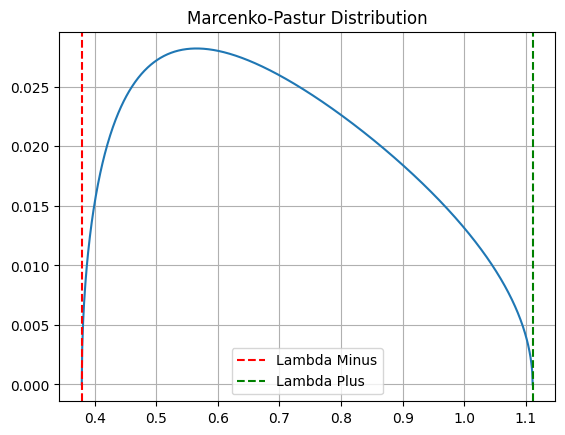

In [88]:
plt.plot(pdf.index, pdf.values)
plt.title("Marcenko-Pastur Distribution")
plt.axvline(x=l_moins, color="r", linestyle="--", label="Lambda Minus")
plt.axvline(x=l_plus, color="g", linestyle="--", label="Lambda Plus")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
from sklearn.neighbors._kde import KernelDensity


In [90]:
eVal  = pca.singular_values_

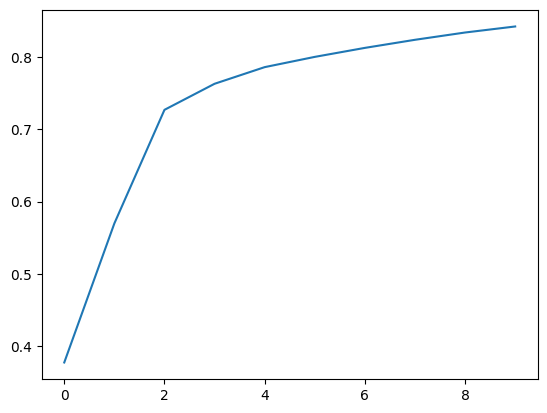

In [100]:
plt.plot(pca.explained_variance_ratio_.cumsum()[:10])

In [91]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(eVal.reshape(-1, 1))
x = np.unique(eVal).reshape(-1, 1)
logProb = kde.score_samples(x)
kde_pdf = pd.Series(np.exp(logProb), index=x.flatten())

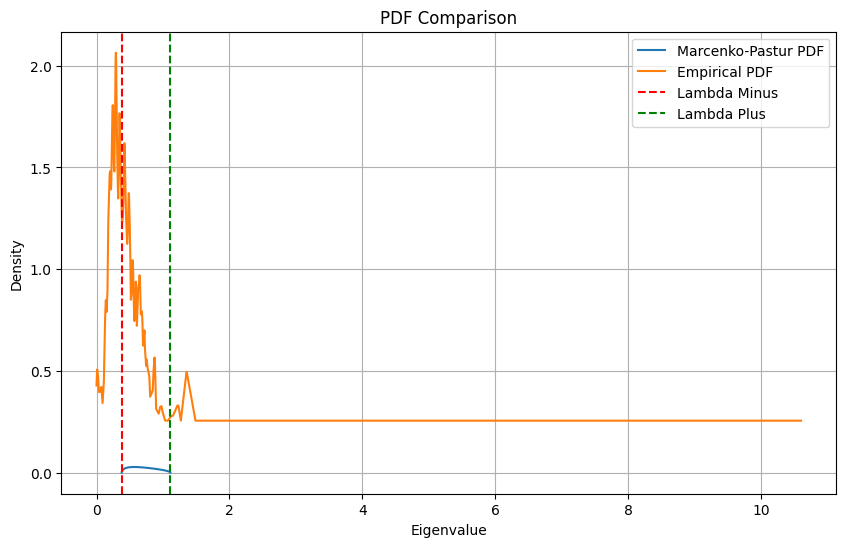

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(pdf.index, pdf.values, label="Marcenko-Pastur PDF")
plt.plot(kde_pdf.index, kde_pdf.values, label="Empirical PDF")
plt.axvline(x=l_moins, color="r", linestyle="--", label="Lambda Minus")
plt.axvline(x=l_plus, color="g", linestyle="--", label="Lambda Plus")
plt.title("PDF Comparison")
plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

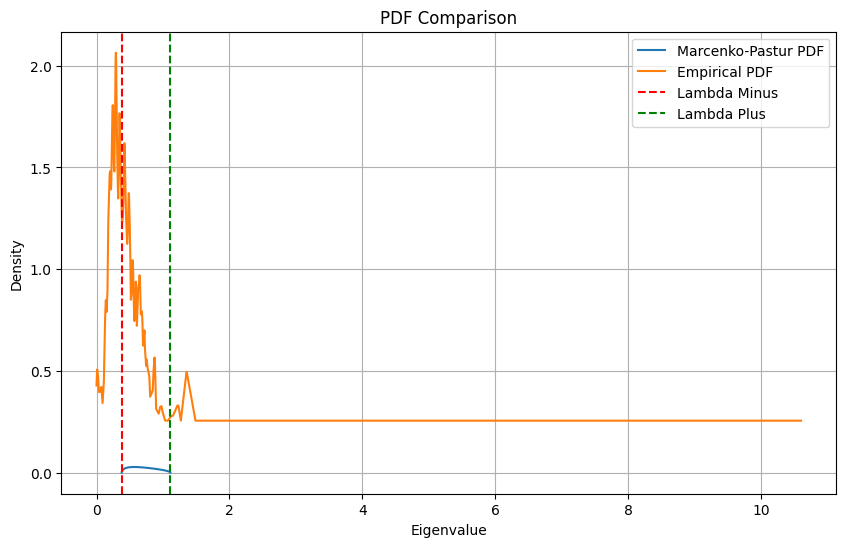

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(pdf.index, pdf.values, label="Marcenko-Pastur PDF")

plt.plot(kde_pdf.index, kde_pdf.values, label="Empirical PDF")
plt.axvline(x=l_moins, color="r", linestyle="--", label="Lambda Minus")
plt.axvline(x=l_plus, color="g", linestyle="--", label="Lambda Plus")
plt.title("PDF Comparison")
plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

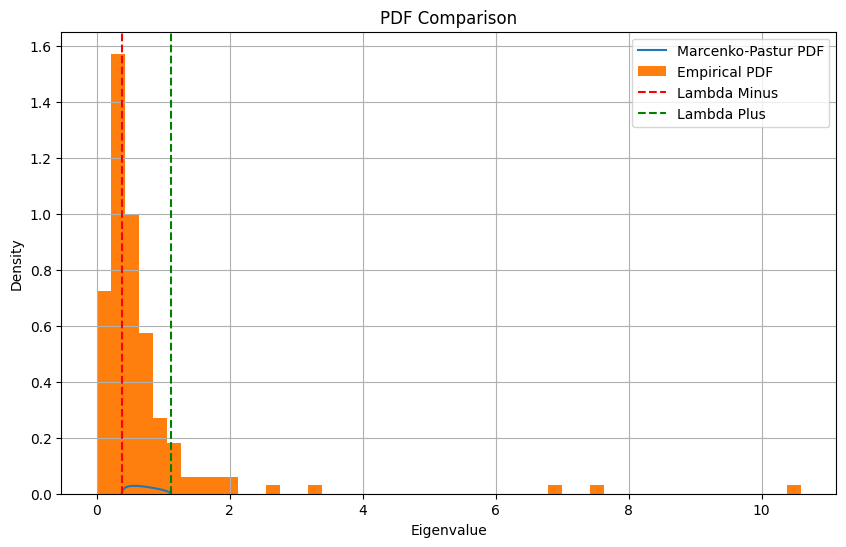

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(pdf.index, pdf.values, label="Marcenko-Pastur PDF")
plt.hist(eVal, density=True, bins=50, label="Empirical PDF")
plt.axvline(x=l_moins, color="r", linestyle="--", label="Lambda Minus")
plt.axvline(x=l_plus, color="g", linestyle="--", label="Lambda Plus")
plt.title("PDF Comparison")
plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [112]:
pca_proj = pca.components_[:3]
new_corr = correlation_matrix@ pca_proj.T

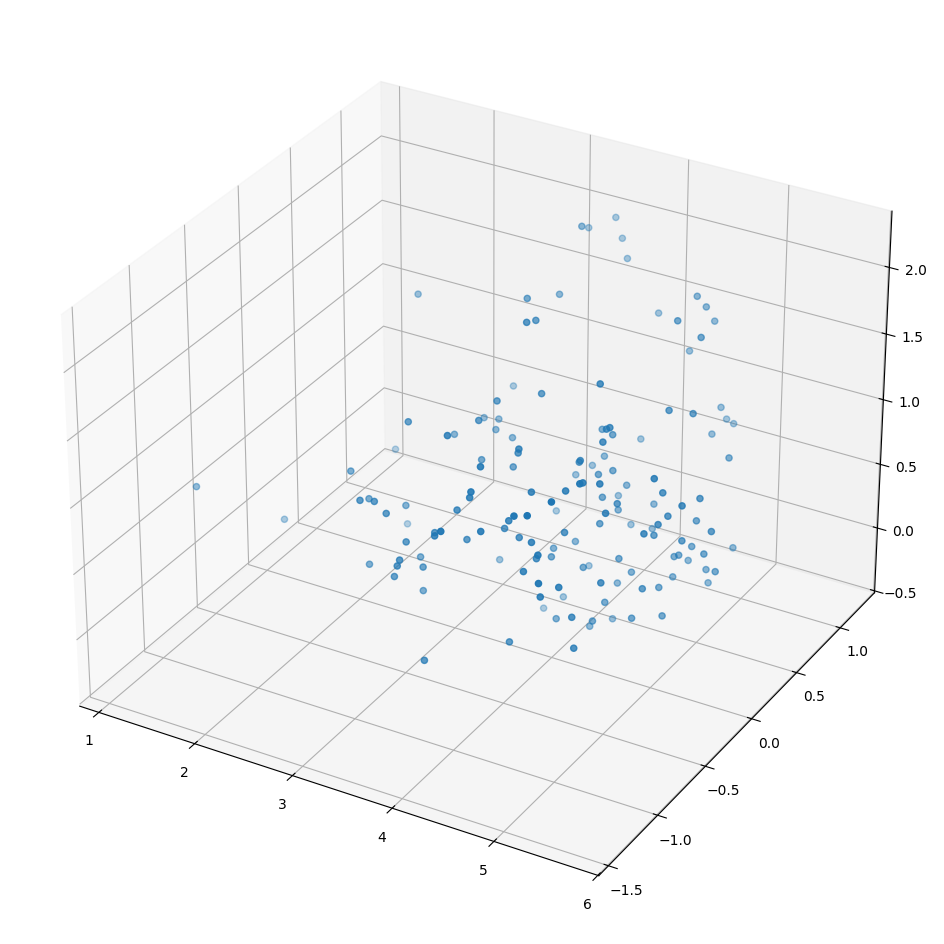

In [113]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(new_corr[0], new_corr[1], new_corr[2])
plt.show()


# Applying Optic/ DBScan 

# Rules for pair selection 

## Check for cointegration

In [ ]:
# Engle granger 

## Check that the spread is mean reverting

In [ ]:
# Hurst Exponent 

## Check that the spread is tradable 

In [ ]:
#

## Check spread reversion is consistent 


In [ ]:
# mean_cross superior to 12 